In [28]:
import numpy as np
import pandas as pd

## **importing the dataset using pandas**

In [29]:
data=pd.read_csv("PersonalLoan.csv")

In [30]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## **removing the unnecessary columns**

In [31]:
data.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [32]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## **checking for null values**

In [33]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## **checking for boxplot**

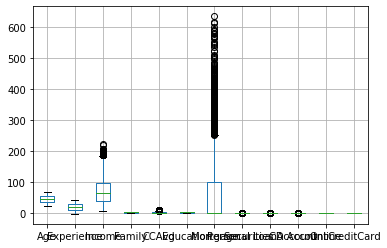

In [34]:
data.boxplot()

## **finding the corelation and then removing the columns**

In [14]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


### **the columns with less correlation are  "Age","Experience","Online","CreditCard"**

In [35]:
data.drop(["Age","Experience","Online","CreditCard"],axis=1,inplace=True)

In [36]:
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0


## **performing the random forest**

In [17]:
data.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account'],
      dtype='object')

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [22]:
features=['Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities Account', 'CD Account']
       

In [24]:
rf_model.fit(X=data[features],y=data["Personal Loan"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print(rf_model.oob_score_)

0.9884


In [26]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Income 0.36750713541072416
Family 0.12443329672343735
CCAvg 0.19311809879964403
Education 0.2142935000947319
Mortgage 0.041208900041300914
Securities Account 0.005320367963700133
CD Account 0.05411870096646131
